In [69]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [2]:
m_e =1
h_cut = 1
g = 10

In [28]:
def d_dx(f, x,alpha):
    h = x[1] - x[0]
    f_dash = np.zeros(len(x))
    
    for i in range(len(x)-1):
        f_dash[i] = ( f(alpha,x[i+1]) - f(alpha,x[i]) )/h
    
    return f_dash

In [29]:
def d_2_dx(f, x, alpha):
    h = x[1] - x[0]
    f_double_dash = np.zeros(len(x))
    
    for i in range(1, len(x)-1):
        f_double_dash[i] = ( f(alpha,x[i+1]) - 2*f(alpha,x[i]) + f(alpha,x[i-1])) / h**2
        
    return f_double_dash

In [30]:
def bra_H_ket(f, V, x_grid,alpha):
    T_ket = (-1/2)*d_2_dx(f,x_grid, alpha)
    
    bra_T_ket = simps(np.conj(f(alpha,x_grid)) * T_ket, x_grid)
    bra_V_ket = simps(np.conj(f(alpha,x_grid))*V*f(alpha,x_grid), x_grid)
    
    bra_H_ket = bra_T_ket + bra_V_ket
    
    return bra_H_ket

In [31]:
def bra_ket_overlap(f, x_grid,alpha):
    bra_ket_integrate = simps(np.conj(f(alpha,x_grid))*f(alpha,x_grid) , x_grid)
    
    return bra_ket_integrate

In [32]:
def expected_energy(f, V, x_grid,alpha):
    bra_h_ket = bra_H_ket(f, V, x_grid, alpha)
    bra_ket_integrate = bra_ket_overlap(f, x_grid,alpha)
    
    bra_E_ket = bra_h_ket / bra_ket_integrate
    
    return bra_E_ket

                        # Gradient Descent
    alpha = parameter
    step_grad = const
    grad = dE/dalpha
    updated_alpha = alpha - (step_grad * grad)
    

                             # Gradient
 The expression of gradient would change, according to the energy expectation expression

         # Implementing the gradient descent opt with the help of initial values

In [70]:
alpha_update_list = []
E_list = []
x_grid = np.arange(0,20,0.01)
V = m_e*g*x_grid
psi_trial = lambda alpha,x: x*np.exp(-alpha*x)

# Intitial Values that will be used to start the gradient descent
alpha = 1
E0 = expected_energy(psi_trial, V, x_grid, alpha)

h = 0.01
alpha0 = alpha
alpha = alpha0 + h
num_iterations = 2000
step = 0.001

for iter in range(num_iterations):
    
    E1 = expected_energy(psi_trial, V, x_grid,alpha)
    dE_dalpha = (E1 - E0)/ (alpha - alpha0)
    
    updated_alpha = alpha - step*dE_dalpha
    alpha_update_list.append(updated_alpha)
    E_list.append(E1)
    
    alpha0 = alpha
    alpha = updated_alpha
    E0  = E1

In [71]:
alpha

2.4641774678691184

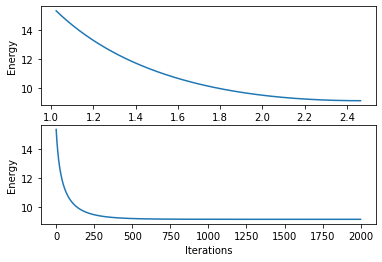

In [74]:
plt.subplot(2,1,1)
plt.plot(alpha_update_list, E_list)
plt.xlabel("updated_alphas")
plt.ylabel("Energy")
plt.subplot(2,1,2)
iterations = np.arange(0,num_iterations, 1)
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.plot(iterations, E_list)